# Introduction

Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack." [Source]

Key facts according to WHO (World Health Organaizations).
Cardiovascular diseases (CVDs) are the leading cause of death globally.
An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
Over three quarters of CVD deaths take place in low- and middle-income countries.
Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

# Step 1 Problem Statement

Heart disease is one of the leading causes of death worldwide. 
Early detection and accurate prediction of heart-related conditions can help save lives.
This project aims to build a machine learning model that can predict whether a person is likely to have heart disease based on various health parameters.

#### Objective
To perform Exploratory Data Analysis (EDA) on the heart disease dataset and understand key patterns.
and compare different classification algorithms for predicting heart disease.

### dataset Overview

In [656]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 Data Collecting

In [659]:
df = pd.read_csv("heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Step 3 Exploratory Data Analysis (EDA)

In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [664]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [666]:
df.shape

(920, 16)

In [668]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [670]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [672]:
df.duplicated().sum()

0

In [674]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

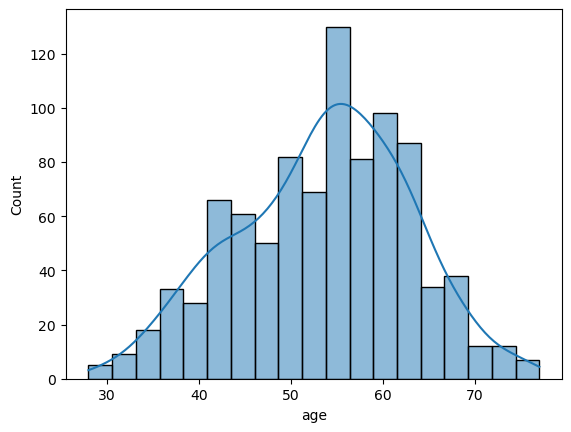

In [676]:
# draw a histogram to see the distribution of age column
sns.histplot(df["age"], kde=True)
plt.show()

In [677]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

C:\Users\soniv\AppData\Local\Temp\ipykernel_38264\2811682812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(x=df['sex'], palette="RdBu")


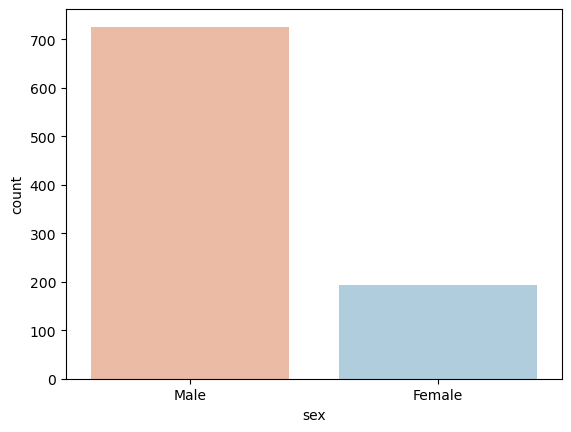

In [680]:
x=sns.countplot(x=df['sex'], palette="RdBu")
plt.show()

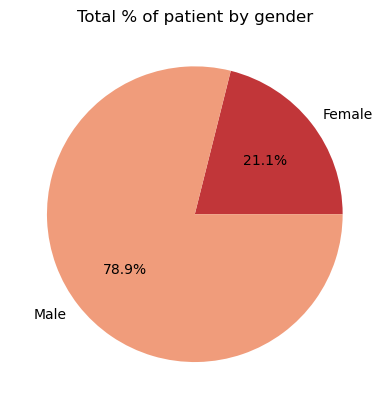

In [682]:
a = df.groupby("sex")["id"].count()
colors = sns.color_palette("RdBu")[0:2]
plt.pie(a,autopct="%.1f%%", colors=colors, labels=a.index)
plt.title("Total % of patient by gender")
plt.show()

In [684]:
# find unique values count in dataset colum
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

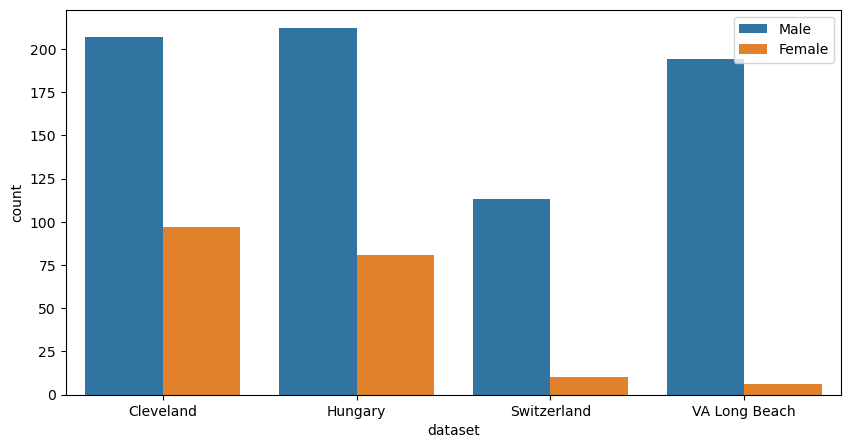

In [686]:
#plot in graph
plt.figure(figsize=(10,5))
sns.countplot(x=df["dataset"], hue="sex", data=df)
plt.legend(loc=1)
plt.show()

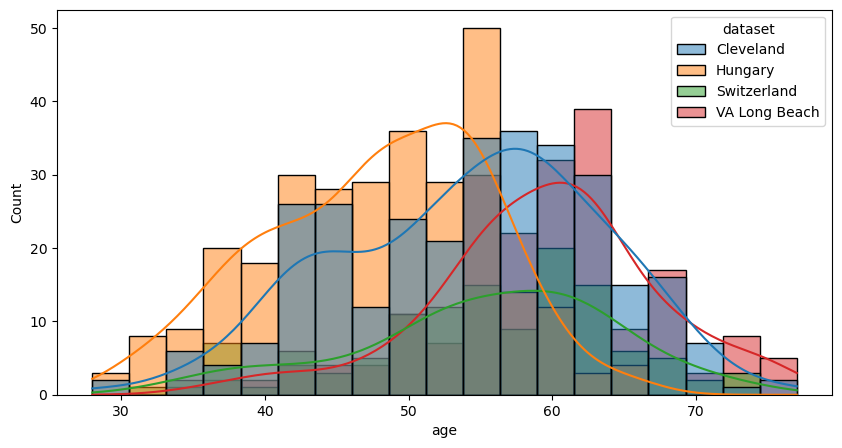

In [687]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", hue="dataset", kde=True)
plt.show()

In [689]:
df["cp"].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

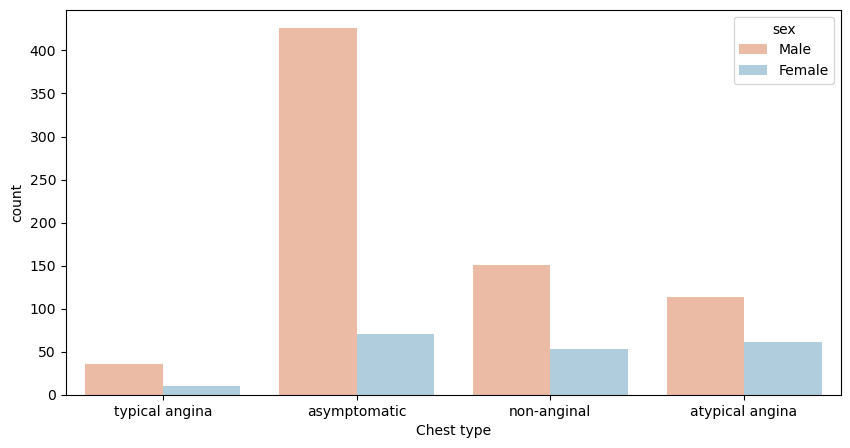

In [692]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["cp"], data=df, hue="sex", palette="RdBu")
plt.xlabel("Chest type")
plt.show()

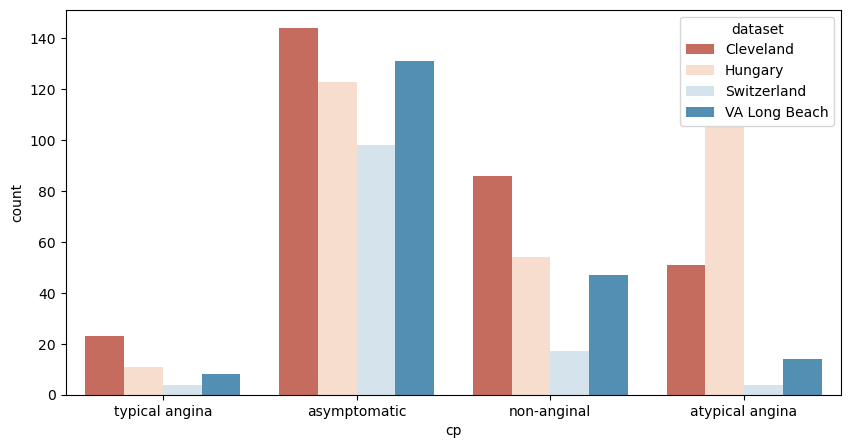

In [694]:
# count plot of cp column by dataset column
plt.figure(figsize=(10,5))
sns.countplot(x=df["cp"], hue="dataset", data=df, palette="RdBu")
plt.show()

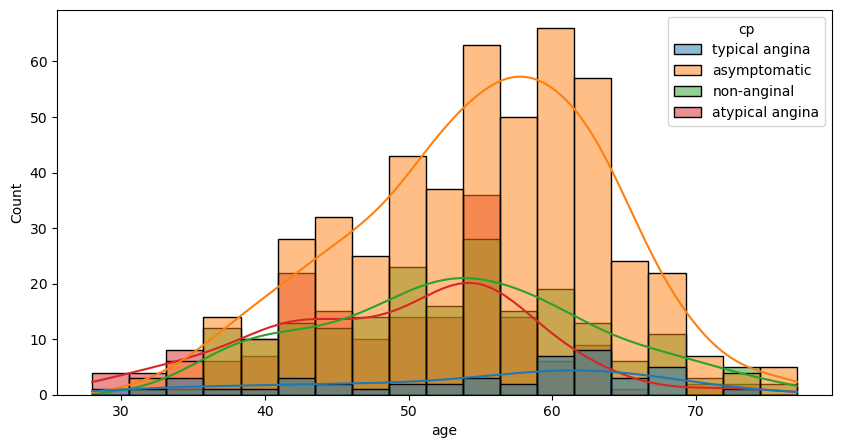

In [696]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", hue="cp", kde=True)
plt.show()

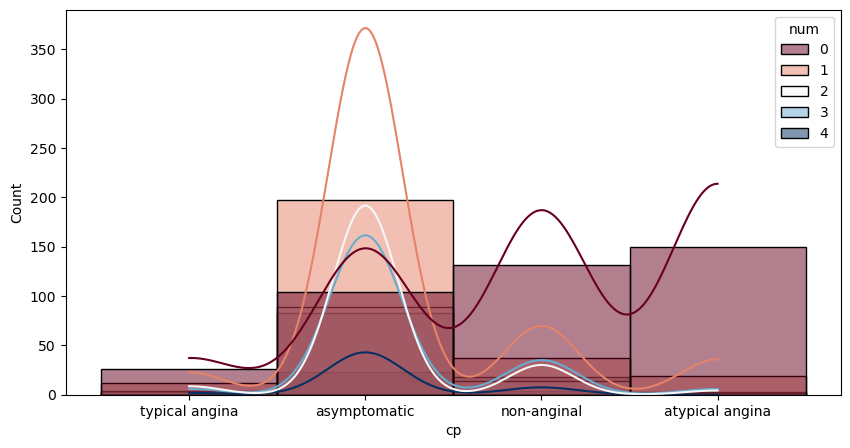

In [698]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="cp", hue="num", kde=True, palette="RdBu")
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_38264\1400384410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num", y='trestbps', data=df, palette="RdBu")


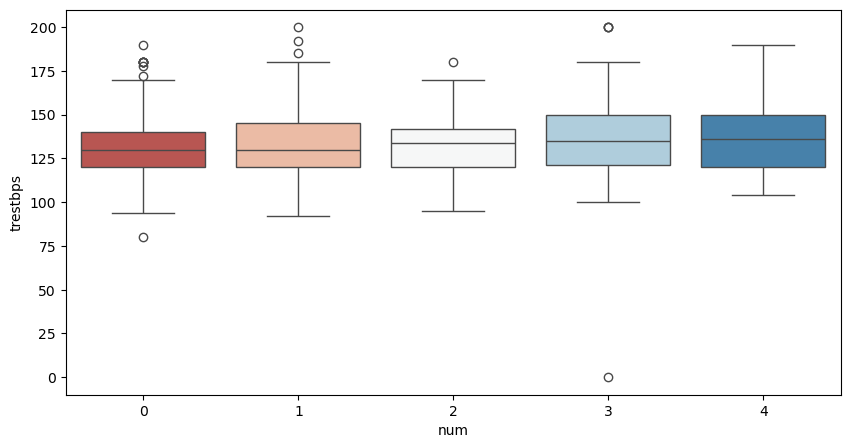

In [700]:
# Plotting Resting Blood Pressure vs Disease
plt.figure(figsize=(10,5))
sns.boxplot(x="num", y='trestbps', data=df, palette="RdBu")
plt.show()

In [702]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

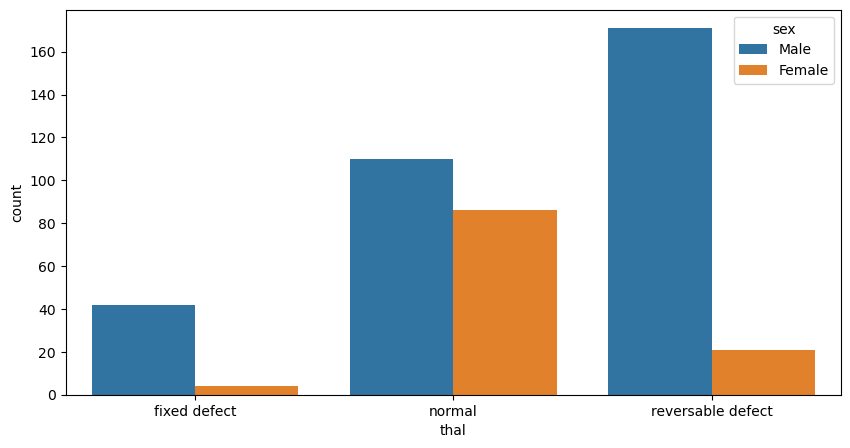

In [704]:
# count plot of cp column by dataset column
plt.figure(figsize=(10,5))
sns.countplot(df, x='thal', hue='sex')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


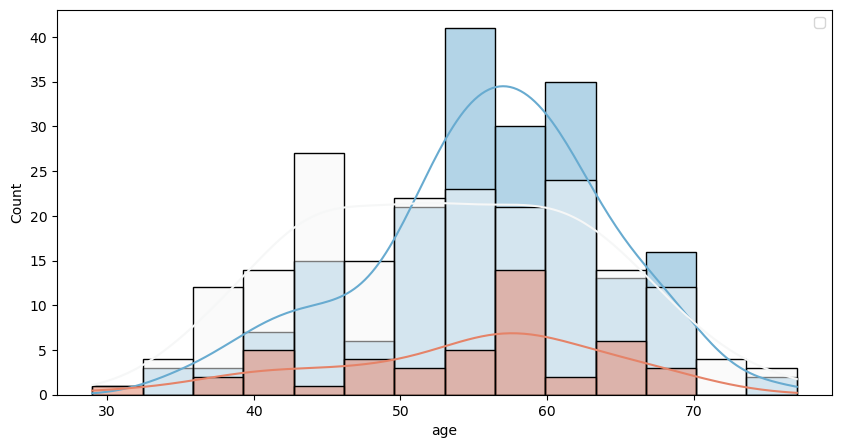

In [706]:
plt.figure(figsize=(10,5))
sns.histplot(x='age',data=df, kde=True, hue='thal', palette="RdBu")
plt.legend(loc=1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


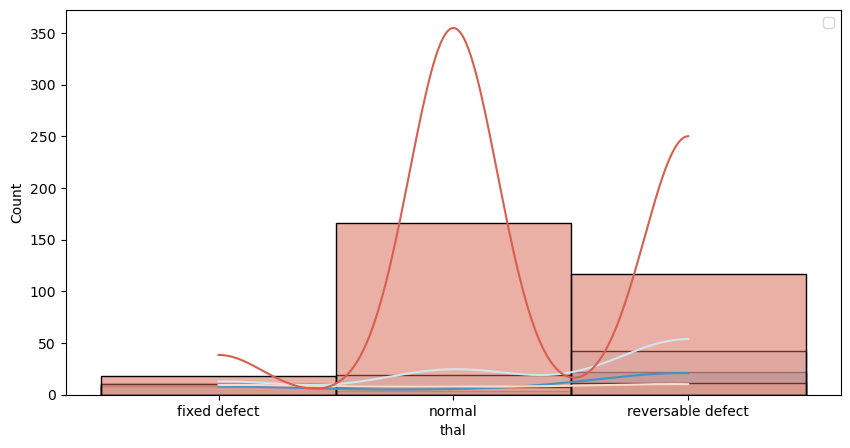

In [708]:
plt.figure(figsize=(10,5))
sns.histplot(x='thal',data=df, kde=True, hue='dataset', palette="RdBu")
plt.legend(loc=1)
plt.show()

In [709]:
# Groupby num with sex 
df.groupby('num')['sex'].value_counts()

num  sex   
0    Male      267
     Female    144
1    Male      235
     Female     30
2    Male       99
     Female     10
3    Male       99
     Female      8
4    Male       26
     Female      2
Name: count, dtype: int64

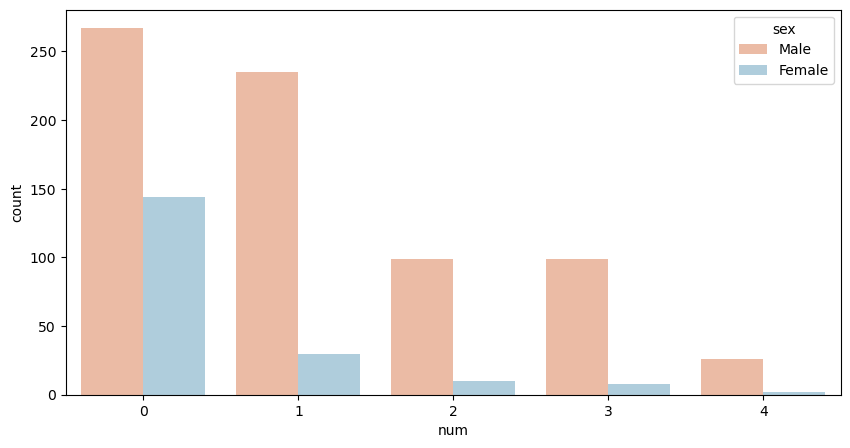

In [710]:
# Plot to Visualize
plt.figure(figsize=(10,5))
sns.countplot(df, x='num', hue='sex', palette="RdBu")
plt.show()

<Figure size 1000x500 with 0 Axes>

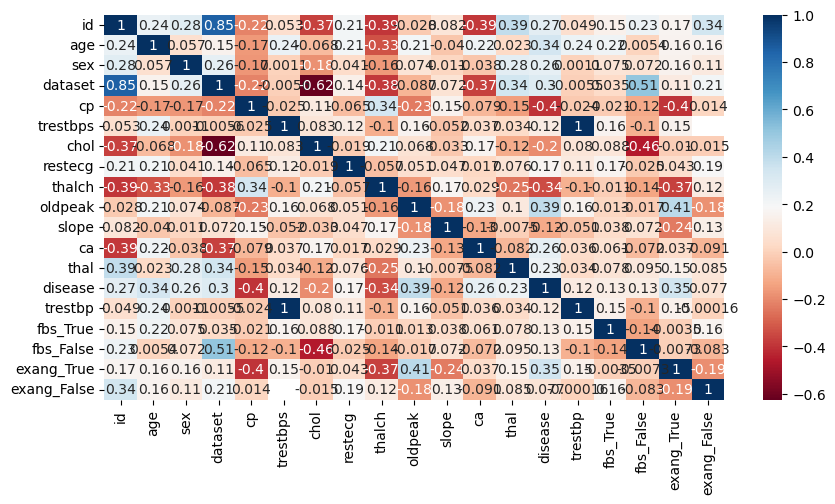

In [744]:
a = df.corr()
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap="RdBu")
plt.show()

In [714]:
df["sex"] = df["sex"].replace({"Male":1, "Female":0})

C:\Users\soniv\AppData\Local\Temp\ipykernel_38264\1762169012.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"Male":1, "Female":0})


In [781]:
df["disease"] = df["disease"].replace({2:1,3:1, 4:1})

In [ ]:
df["dataset"] = df["dataset"].replace({"Cleveland":0,"Hungary":1, "VA Long Beach":2, "Switzerland":3})
df["cp"] = df["cp"].replace({"asymptomatic":0, "non-anginal":1, "atypical angina":2, "typical angina":3})
df["fbs"] = df["fbs"].replace({"True":1, "False":0})
df["restecg"] = df["restecg"].replace({"normal":0, "lv hypertrophy":1, "st-t abnormality":2})
df["exang"] = df["exang"].replace({"True":1, "False":0})
df["slope"] =df["slope"].replace({"flat":0, "upsloping":1, "downsloping":2})
df["thal"] = df["thal"].replace({"normal":0, "reversable defect":1, "fixed defect":2})

In [718]:
a = df["trestbps"].mean().round(2)
b = df["oldpeak"].value_counts()
c = df["thalch"].value_counts()
d = df["chol"].value_counts()
e = df["restecg"].value_counts()
f = df["fbs"].value_counts()
g = df["exang"].value_counts()

In [720]:
df["thal"] = df["thal"].fillna(1.0)
df["ca"] = df["ca"].fillna(0.0)
df["slope"] = df["slope"].fillna(1.0)
df["oldpeak"] = df["oldpeak"].fillna(0.0)
df["thalch"] = df["thalch"].fillna(150.0)
df["chol"] = df["chol"].fillna(0.0)
df["trestbp"] = df["trestbps"].fillna(132.12)
df["restecg"] = df["restecg"].fillna(0.0)
df["fbs"] = df["fbs"].fillna("False")
df["exang"] = df["exang"].fillna("False")

In [823]:
#drop column
df = df.dropna(subset=["trestbps"])

In [825]:
df.isnull().sum()

id             0
age            0
sex            0
dataset        0
cp             0
trestbps       0
chol           0
restecg        0
thalch         0
oldpeak        0
slope          0
ca             0
thal           0
disease        0
fbs_True       0
fbs_False      0
exang_True     0
exang_False    0
dtype: int64

In [738]:
#column name change
df.rename(columns={"num":"disease"}, inplace=True)

In [838]:
df["disease"].value_counts()

disease
1    470
0    391
Name: count, dtype: int64

# Feature Engineering 

In [727]:
df = pd.get_dummies(df, columns=["fbs","exang"],drop_first=True)

In [731]:
dummy_cols = [col for col in df.columns if col.startswith("fbs_") or col.startswith("exang_")]
df[dummy_cols] = df[dummy_cols].astype(int)

# Model Building 

In [827]:
X = df.drop(columns="disease")
Y = df["disease"]

In [829]:
# Training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [831]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(688, 17) (173, 17) (688,) (173,)


In [833]:
Y_test

717    0
607    1
120    1
208    0
380    0
      ..
235    1
333    0
215    0
820    1
7      0
Name: disease, Length: 173, dtype: int64

# Model Selection Logistic Regression

In [840]:
from sklearn.linear_model import LogisticRegression

In [870]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')

In [872]:
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [874]:
y_pred = lr.predict(X_test)

In [876]:
#Measuring the model accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [878]:
print("Accuracy Score", accuracy_score(y_pred, Y_test))
print("classification_report",  classification_report(y_pred, Y_test))
print("confusion_matrix", confusion_matrix(y_pred, Y_test))

Accuracy Score 0.8728323699421965
classification_report               precision    recall  f1-score   support

           0       0.86      0.84      0.85        73
           1       0.88      0.90      0.89       100

    accuracy                           0.87       173
   macro avg       0.87      0.87      0.87       173
weighted avg       0.87      0.87      0.87       173

confusion_matrix [[61 12]
 [10 90]]


# Decision Tree Model 

In [884]:
from sklearn.tree import DecisionTreeClassifier

In [886]:
dt = DecisionTreeClassifier()

In [888]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [890]:
y_pred = dt.predict(X_test)

In [894]:
#Measuring the Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.8208092485549133
classification_report               precision    recall  f1-score   support

           0       0.80      0.77      0.79        74
           1       0.83      0.86      0.85        99

    accuracy                           0.82       173
   macro avg       0.82      0.81      0.82       173
weighted avg       0.82      0.82      0.82       173



# Naive Bayes Model

In [897]:
from sklearn.naive_bayes import GaussianNB

In [899]:
gb = GaussianNB()

In [901]:
gb.fit(X_train, Y_train)

GaussianNB()

In [903]:
y_pred = gb.predict(X_test)

In [905]:
#Measuring the Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.8670520231213873
classification_report               precision    recall  f1-score   support

           0       0.87      0.82      0.84        76
           1       0.86      0.91      0.88        97

    accuracy                           0.87       173
   macro avg       0.87      0.86      0.86       173
weighted avg       0.87      0.87      0.87       173



# Support Vector Machine (SVM) Model

In [911]:
from sklearn.svm import SVC

In [913]:
s = SVC()

In [915]:
s.fit(X_train,Y_train)

SVC()

In [917]:
y_pred = s.predict(X_test)

In [919]:
#Measuring the Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.7456647398843931
classification_report               precision    recall  f1-score   support

           0       0.85      0.65      0.73        93
           1       0.68      0.86      0.76        80

    accuracy                           0.75       173
   macro avg       0.76      0.75      0.74       173
weighted avg       0.77      0.75      0.74       173



# K-Nearest Neighbors (KNN) Model

In [922]:
from sklearn.neighbors import KNeighborsClassifier

In [950]:
k = KNeighborsClassifier(n_neighbors=3)

In [952]:
k.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [954]:
y_pred = k.predict(X_test)

In [956]:
#Measuring the Accuracy
print("Accuracy Score",accuracy_score(y_pred, Y_test))
print("classification_report", classification_report(y_pred, Y_test))

Accuracy Score 0.815028901734104
classification_report               precision    recall  f1-score   support

           0       0.76      0.78      0.77        69
           1       0.85      0.84      0.84       104

    accuracy                           0.82       173
   macro avg       0.81      0.81      0.81       173
weighted avg       0.82      0.82      0.82       173

